# **SARIMA Models**

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [6]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/co2_mm_mlo.csv')

data.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
data['date']=pd.to_datetime({'year':data['year'],'month':data['month'],'day':1})
data.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [0]:
data.index.freq='MS'

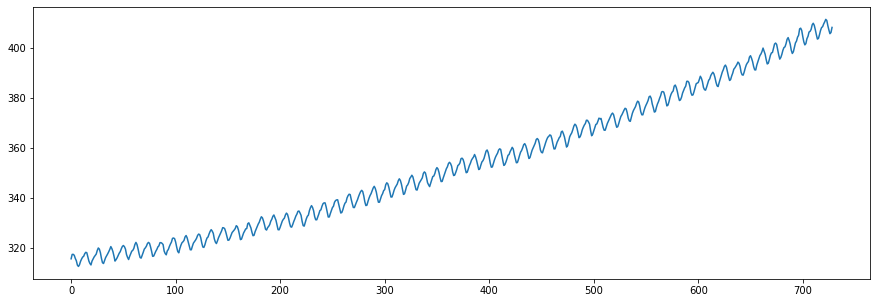

In [16]:
data['interpolated'].plot(figsize=(15,5))

In [0]:
data.index=data['date']

In [0]:
result= seasonal_decompose(data['interpolated'], model='add')

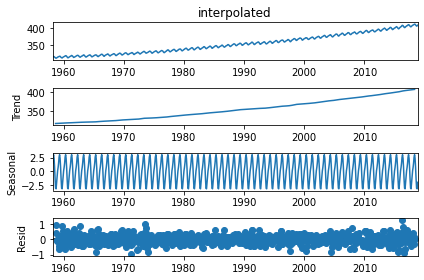

In [23]:
result.plot();

In [25]:
auto_arima(data['interpolated'], seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.434
Date:                            Sun, 24 May 2020   AIC                            428.867
Time:                                    16:30:40   BIC                            451.819
Sample:                                         0   HQIC                           437.723
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.539e-05      0.000      0.211      0.833      -0.000       0.000
ma.L1         -0.3726      0.035    -10.723      0.000      -0.441      -0.304
ar.S.L12       0.9996      0.000   2875.523      0.000       0.999       1.000
ma.S.L12      -0.8658      0.022    -39.475      0.000      -0.909      -0.823
sigma2         0.0976      0.005     20.059      0.000       0.088       0.107
===================================================================================
Ljung-Box (Q):                       51.90   Jarque-Bera (JB):                 3.69
Prob(Q):                              0.10   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
train=data.iloc[:(len(data)-12)]
test=data.iloc[(len(data)-12):]
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Sun, 24 May 2020   AIC                            418.296
Time:                                    16:30:54   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3711      0.034    -10.878      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3239.402      0.000       0.999       1.000
ma.S.L12      -0.8649      0.023    -37.857      0.000      -0.910      -0.820
sigma2         0.0960      0.005     20.209      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.97   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

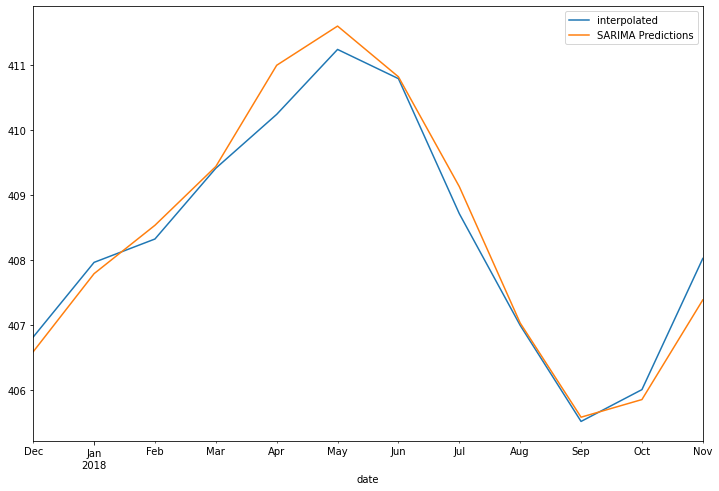

In [30]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [31]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['interpolated'],predictions)
error

0.34623686626591743

**Forecasting into the future**

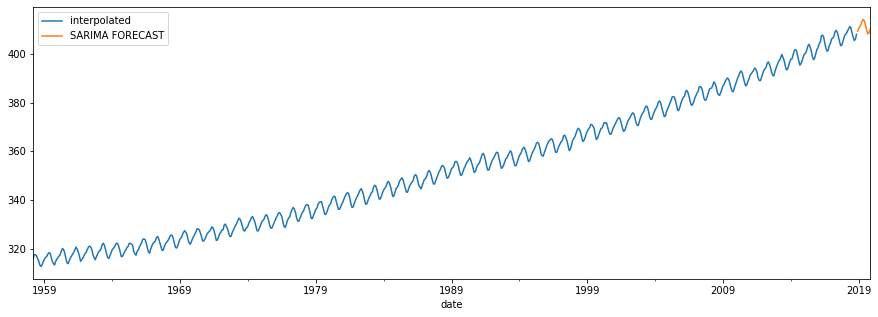

In [32]:
model = SARIMAX(data['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results=model.fit()

forecast = results.predict(len(data),len(data)+11,typ='levels').rename('SARIMA FORECAST')
data['interpolated'].plot(figsize=(15,5),legend=True)
forecast.plot(legend=True)